In [139]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler



Data Collection and Processing

In [140]:
#loading the data from the csv file to pandas DF
car_dataset = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [141]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [142]:
#check the number of rows and columns
car_dataset.shape

(4340, 8)

In [143]:
#get info about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [144]:
#check the total number of NUll values
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [145]:
#check the distrubition of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())
print(car_dataset.name.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64
name
Maruti Swift Dzire VDI                            69
Maruti Alto 800 LXI                               59
Maruti Alto LXi                                   47
Hyundai EON Era Plus                              35
Maruti Alto LX                                    35
                                                  ..
Honda Brio 1.2 S Option MT                         1
Mahindra Bolero Power Plus Plus Non AC BSIV PS     1
Tata Indigo LS BSII                                1
Force One EX                         

Encoding Categorical Data

In [146]:
#encoding "fuel"
car_dataset.replace({'fuel': {'Petrol':0, 'Diesel':1, 'CNG':2,'LPG':3,'Electric':4}}, inplace=True)

#encoding "seller_type"
car_dataset.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)

#encoding "transmission"
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

#encoding "Owner"
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)




<ipython-input-146-39dcb2379eca>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'fuel': {'Petrol':0, 'Diesel':1, 'CNG':2,'LPG':3,'Electric':4}}, inplace=True)
<ipython-input-146-39dcb2379eca>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
<ipython-input-146-39dcb2379eca>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, expli

In [147]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


In [148]:
#Added a New feature to the dataframe "Car_Age"
from datetime import datetime

current_year = datetime.now().year
car_dataset['car_age'] = current_year - car_dataset['year']

car_dataset.drop('year', axis=1, inplace=True)

In [149]:
#Now scale the numerical columns
scaler = StandardScaler()
car_dataset[['km_driven','car_age']] = scaler.fit_transform(car_dataset[['km_driven','car_age']])

In [150]:
car_dataset

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,Maruti 800 AC,60000,0.081139,0,0,0,0,1.445074
1,Maruti Wagon R LXI Minor,135000,-0.347689,0,0,0,0,1.445074
2,Hyundai Verna 1.6 SX,600000,0.724381,1,0,0,0,0.258795
3,Datsun RediGO T Option,250000,-0.433455,0,0,0,0,-0.927485
4,Honda Amaze VX i-DTEC,450000,1.603479,1,0,0,1,-0.215717
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,0.295553,1,0,0,1,-0.215717
4336,Hyundai i20 Magna 1.4 CRDi,409999,0.295553,1,0,0,1,-0.215717
4337,Maruti 800 AC BSIII,110000,0.359877,0,0,0,1,0.970563
4338,Hyundai Creta 1.6 CRDi SX Option,865000,0.509967,1,0,0,0,-0.690229


Splitting the Data and Target

In [151]:
#create 2 variables
X = car_dataset.drop(['name','selling_price'],axis = 1)
Y = car_dataset['selling_price']


In [152]:
X

,km_driven,fuel,seller_type,transmission,owner,car_age
0,0.081139,0,0,0,0,1.445074
1,-0.347689,0,0,0,0,1.445074
2,0.724381,1,0,0,0,0.258795
3,-0.433455,0,0,0,0,-0.927485
4,1.603479,1,0,0,1,-0.215717
...,...,...,...,...,...,...
4335,0.295553,1,0,0,1,-0.215717
4336,0.295553,1,0,0,1,-0.215717
4337,0.359877,0,0,0,1,0.970563
4338,0.509967,1,0,0,0,-0.690229


In [153]:
Y

,selling_price
0,60000
1,135000
2,600000
3,250000
4,450000
...,...
4335,409999
4336,409999
4337,110000
4338,865000


Spitting Train and Test Data


In [154]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

Model Training


1.Linear Regression

In [155]:
#loading the linear regression model
lin_reg_model = LinearRegression()


In [156]:
#The fit function is used to train the train data
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evalutaion


In [157]:
#prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [170]:
#metrics for tranied data
error =  metrics.r2_score(Y_train,training_data_prediction)
print(f'R-squared Error : {error}')

mae = metrics.mean_absolute_error(Y_train,training_data_prediction)
print(f'Mean Absolute Error : {mae}')

mse = metrics.mean_squared_error(Y_train,training_data_prediction)
print(f'Mean Squared Error : {mse}')



R-squared Error : 0.4325630227506242
Mean Absolute Error : 233021.49005242213
Mean Squared Error : 189703482863.8686


In [178]:
test_predictions = lin_reg_model.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_predictions)
print("Test R² Score:", r2_test)


Test R² Score: 0.5123159688209238


Visualize the actual prices and Predicted prices

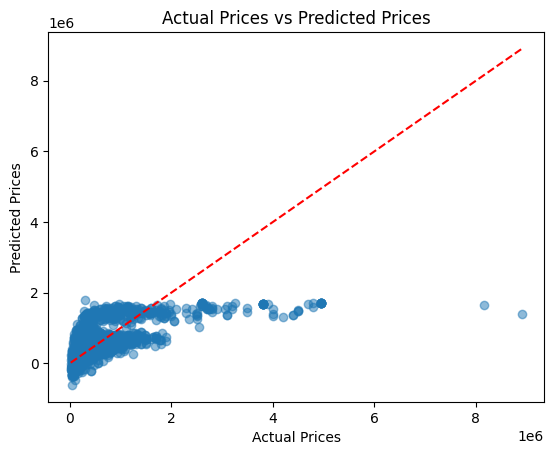

In [179]:
plt.scatter(Y_train, training_data_prediction, alpha=0.5)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--')  # diagonal perfect-fit line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()


In [180]:
#manual price check

# Replace these with your test values in same order
input_values = [[50000, 5, 0, 0, 0, 0]]


# Wrap it in a DataFrame with the correct column names
input_df = pd.DataFrame(input_values, columns=X.columns)

input_df[['km_driven', 'car_age']] = scaler.transform(input_df[['km_driven', 'car_age']])
# Predict
predicted_price = lin_reg_model.predict(input_df)
print(f"Predicted price: {predicted_price[0]}")


Predicted price: 1801298.978334318
